<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/RNN_and_LSTM_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Data Preprocessing

In [3]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [4]:
# loading the dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [11]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.min(), x_train.max()

(0.0, 1.0)

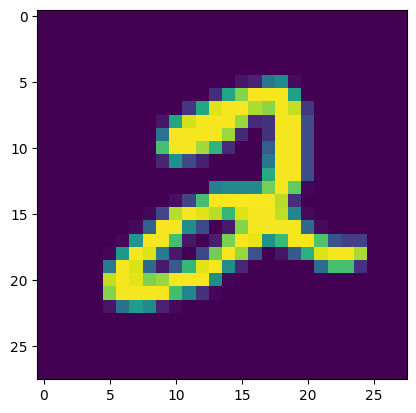

In [13]:
plt.imshow(x_train[5])

In [14]:
y_train[5]

2

# Step 3 : Building the LSTM

In [15]:
# define an object  (initializing the RNN)
model = tf.keras.models.Sequential()

In [17]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units = 128, activation = 'relu', return_sequences = True, input_shape = (28, 28))) # return sequences can be set to true only if the following layer is also LSTM | it does not work with the Dense layers
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

# output layer

model.add(tf.keras.layers.Dense(units= 10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 28, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,010 (1.33 MB)

 Trainable params: 348,010 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [21]:
# compile the model
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# Step 4 : Training the Model

In [22]:
history = model.fit(x_train, y_train, epochs = 10, validation_data =(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 250s 130ms/step - accuracy: 0.6063 - loss: 1.1524 - val_accuracy: 0.9553 - val_loss: 0.1494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 250s 124ms/step - accuracy: 0.9515 - loss: 0.1866 - val_accuracy: 0.9739 - val_loss: 0.0926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 124ms/step - accuracy: 0.9689 - loss: 0.1209 - val_accuracy: 0.9792 - val_loss: 0.0706
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 123ms/step - accuracy: 0.9760 - loss: 0.0873 - val_accuracy: 0.9832 - val_loss: 0.0578
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 235s 125ms/step - accuracy: 0.9805 - loss: 0.0765 - val_accuracy: 0.9707 - val_loss: 0.1040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 274s 132ms/step - accuracy: 0.9815 - loss: 0.0752 - val_accuracy: 0.9856 - val_loss: 0.0531
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 252s 127ms/step - accuracy: 0.9865 - loss: 0.0532 - val_accuracy: 0.9857 - val_loss: 0.0533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 265s 128ms/step - ac

In [32]:
y_pred  = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


In [33]:
print(y_pred[0]), print(y_test[0])

7
7


(None, None)

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 973    0    1    1    0    0    1    1    3    0]
 [   0 1128    1    0    0    2    0    4    0    0]
 [   2    3 1015    5    0    0    0    5    1    1]
 [   0    0    2 1005    0    2    0    1    0    0]
 [   0    0    0    0  957    0    5    2    0   18]
 [   0    0    0    7    0  883    1    1    0    0]
 [   1    2    1    0    0    5  947    0    2    0]
 [   0    1    6    2    1    0    0 1014    0    4]
 [   0    0    5    2    0    4    2    2  957    2]
 [   0    0    0    0    3    2    0    4    1  999]]


In [36]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9878


# Step 5 : Learning Curve

In [37]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

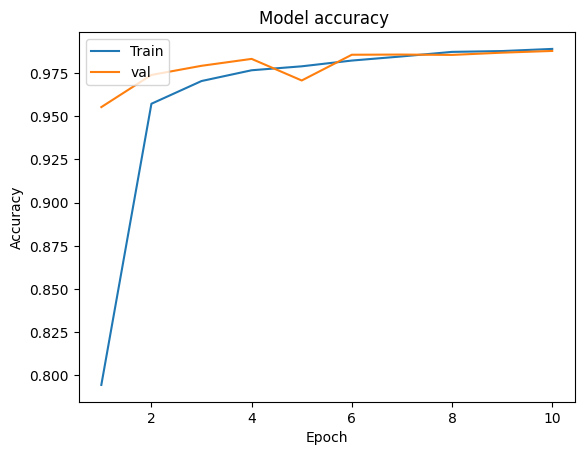

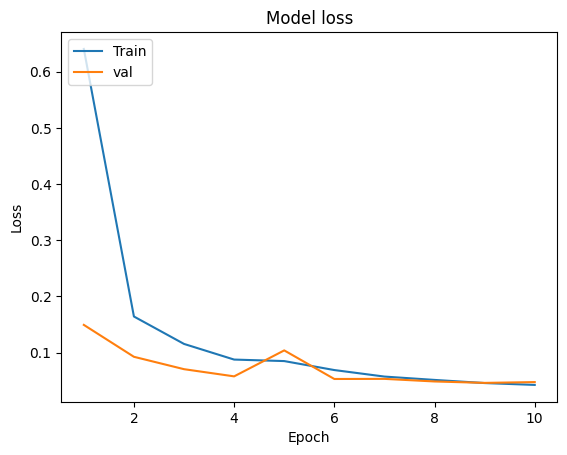

In [38]:
learning_curve(history, 10)